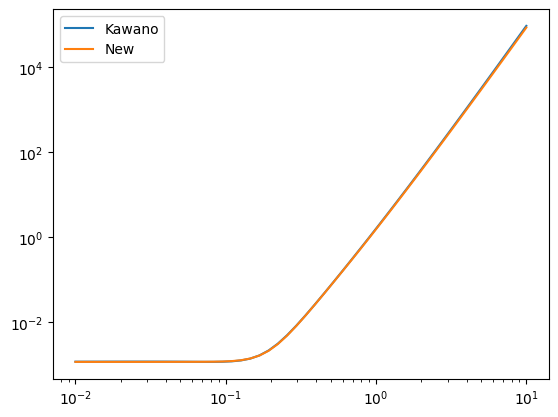

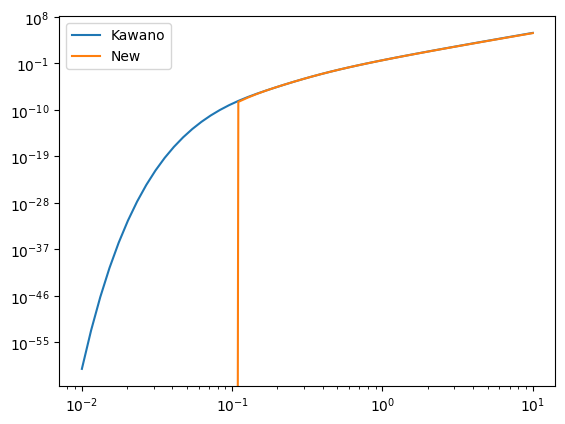

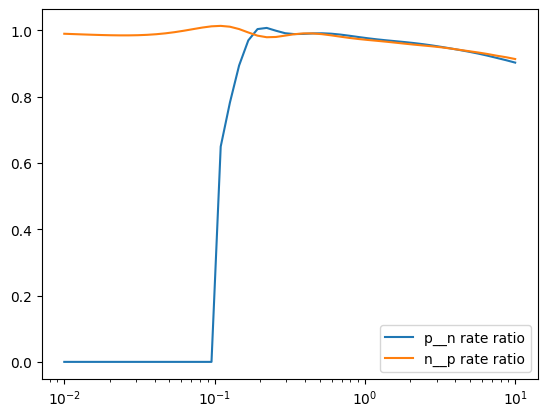

In [30]:
import numpy as np
import matplotlib.pyplot as plt

b0 = -0.62173 
b1 = 0.22211e2
b2 = -0.72798e2
b3 = 0.11571e3
b4 = -0.11763e2
b5 = 0.45521e2
b6 = -3.7973 
b7 = 0.41266 
b8 = -0.026210
b9 = 0.87934e-3
b10 = -0.12016e-4
qpn = 2.8602

def p__n(T):  
    # p --> n
    
    z=5.92989658/(T*11.60451812)
    rate=0
    #rate from https://arxiv.org/pdf/astro-ph/0408076.pdf appendix C
    b=[b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10]
    if T>0.1:
      for i in range(11):
         rate+=1/880.2*np.exp(-qpn*z)*b[i]*z**-i 
        
    #Kawano rate
    #rate=1/879.6*(5.252/z - 16.229/z**2 + 18.059/z**3 + 34.181/z**4 + 27.617/z**5)*np.exp(-2.530988*z)
    return rate

def p__nold(T):  
    # p --> n
    z=5.92989658/(T*11.60451812)
    rate=1/880.2*(5.252/z - 16.229/z**2 + 18.059/z**3 + 34.181/z**4 + 27.617/z**5)*np.exp(-2.530988*z)
    return rate



a0 = 1 #1 to include free decay
a1 = 0.15735 
a2 = 4.6172
a3 = -0.40520e2 
a4 = 0.13875e3 
a5 = -0.59898e2
a6 = 0.66752e2 
a7 = -0.16705e2 
a8 = 3.8071
a9 = -0.39140 
a10 = 0.023590 
a11 = -0.83696e-4
a12 = -0.42095e-4 
a13 = 0.17675e-5
qnp = 0.33979 

def n__p(T):
    # n --> p
    z=5.92989658/(T*11.60451812)
    #rate from https://arxiv.org/pdf/astro-ph/0408076.pdf appendix C
    rate=0
    a=[a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13]
    for i in range(14):
      rate+=1/880.2*np.exp(-qnp/z)*a[i]*z**-i

    return rate

def n__pold(T):
    # n --> p
    z=5.92989658/(T*11.60451812)
    #Kawano rate
    rate = 1/880.2*(1+0.565/z - 6.382/z**2 + 11.108/z**3 + 36.492/z**4 + 27.512/z**5)

    return rate



Temps=np.logspace(1,-2)
plt.figure('n__p')
plt.plot(Temps,n__pold(Temps),label='Kawano')
plt.plot(Temps,n__p(Temps),label='New')
plt.xscale('log')
plt.yscale('log')
plt.legend()

Temps=np.logspace(1,-2)
plt.figure('p__n')
plt.plot(Temps,p__nold(Temps),label='Kawano')
plt.plot(Temps,[p__n(T) for T in Temps],label='New')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.figure('ratios')
plt.plot(Temps,np.array([p__n(T) for T in Temps])/p__nold(Temps),label='p__n rate ratio')
plt.plot(Temps,n__p(Temps)/n__pold(Temps),label='n__p rate ratio')
plt.xscale('log')
plt.legend()

In [7]:
list(np.logspace(-2,1))

[0.01,
 0.011513953993264476,
 0.013257113655901088,
 0.015264179671752335,
 0.017575106248547922,
 0.020235896477251575,
 0.02329951810515372,
 0.026826957952797256,
 0.030888435964774818,
 0.03556480306223129,
 0.040949150623804255,
 0.04714866363457395,
 0.05428675439323859,
 0.06250551925273973,
 0.07196856730011521,
 0.08286427728546843,
 0.0954095476349994,
 0.10985411419875583,
 0.12648552168552957,
 0.14563484775012436,
 0.16768329368110083,
 0.19306977288832494,
 0.22229964825261944,
 0.2559547922699536,
 0.29470517025518095,
 0.3393221771895328,
 0.39069399370546165,
 0.44984326689694465,
 0.517947467923121,
 0.5963623316594643,
 0.6866488450043001,
 0.7906043210907697,
 0.9102981779915217,
 1.0481131341546852,
 1.2067926406393288,
 1.3894954943731375,
 1.5998587196060572,
 1.8420699693267164,
 2.1209508879201904,
 2.44205309454865,
 2.8117686979742307,
 3.2374575428176433,
 3.727593720314938,
 4.2919342601287775,
 4.941713361323833,
 5.689866029018294,
 6.5512855685955085,
 